In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\vanga\Desktop\bankf.csv')

In [3]:
df.shape

(41188, 11)

In [4]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [5]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.isnull().any()

age               False
duration          False
campaign          False
pdays             False
previous          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
subscribe         False
dtype: bool

In [7]:
x=df.iloc[:,0:-1].values

In [8]:
x

array([[ 5.6000e+01,  2.6100e+02,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       [ 5.7000e+01,  1.4900e+02,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       [ 3.7000e+01,  2.2600e+02,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       ...,
       [ 5.6000e+01,  1.8900e+02,  2.0000e+00, ..., -5.0800e+01,
         1.0280e+00,  4.9636e+03],
       [ 4.4000e+01,  4.4200e+02,  1.0000e+00, ..., -5.0800e+01,
         1.0280e+00,  4.9636e+03],
       [ 7.4000e+01,  2.3900e+02,  3.0000e+00, ..., -5.0800e+01,
         1.0280e+00,  4.9636e+03]])

In [9]:
y=df.iloc[:,-1].values

In [10]:
y

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y=lb.fit_transform(y)


In [12]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
x_train.shape

(32950, 10)

In [15]:
y_train.shape

(32950,)

In [16]:
x_test.shape

(8238, 10)

In [17]:
y_test.shape

(8238,)

In [18]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [19]:
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
y_pred=lr.predict(x_test)

In [21]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test,y_pred)

0.9145423646516144

In [24]:
y_pred1=lr.predict([[1,25,25,35,15,25,36,24,87,86]])

In [25]:
y_pred1

array([0])

In [26]:
y_pred1=lr.predict([[41,1575,1,999,0,1.1,93.994,-36.4,4.857,5191]])

In [27]:
y_pred1

array([1])

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_test,y_pred)

array([[7133,  186],
       [ 518,  401]], dtype=int64)

In [30]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)

In [31]:
roc_auc

0.7054652720920598

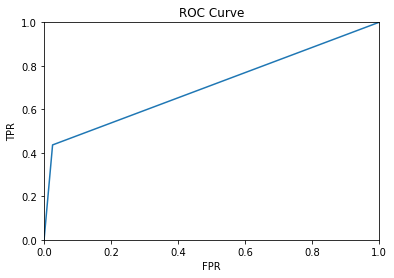

In [32]:
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

In [33]:
import seaborn as sns

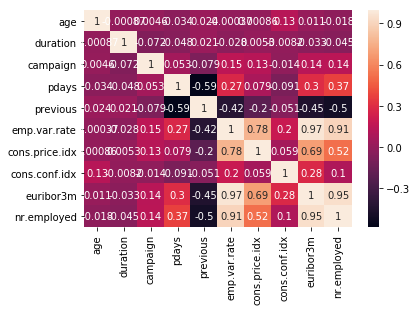

In [34]:
sns.heatmap(df.corr(),annot=True)

In [35]:
y_pred1=lr.predict([[41,1575,1,999,0,1.1,93.994,-36.4,4.857,5191]])

In [36]:
y_pred1

array([1])